<a href="https://colab.research.google.com/github/aryachandrak/Machine-Learning-2024-Ganjil/blob/main/Jobsheet4/Praktikum1_Klasifikasi_SVM_dengan_Data_Dummy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Terpisah Secara Linear

In [4]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

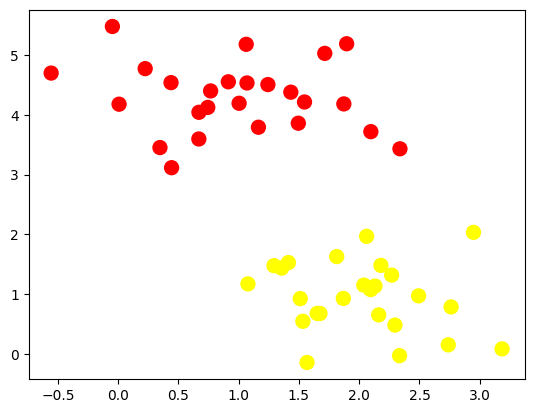

In [5]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='autumn')

# Penjelasan kode dari baris ke 2
# make_blobs digunakan untuk membuat data sintesis berupa kluster
# n_sample=50 berarti jumlah sample data 50
# centers=2 berarti terdapat 2 kluster
# ramdom_state digunakan agar data akan tetap sama jika dijalankan ulang
# cluster_std=0.60 berarti penyebaran data sekitar 0.6 dari pusat cluster(centroid)

# penjelasan kode dari baris ke 3
# plt.scatter merupakan fungsi dari matplotlib untuk membuat scatter plot
# X[:, 0], X[:, 1] menghasilkan koordinat x dan y
# c=y otomatis mewarnai titik berdasarkan kluster
# s=50 mengatur ukuran titik
# cmap='autumn' mengatur warna yang digunakan

In [6]:
print(X.shape)
print(y.shape)
print("\n")
print(X[:5])
print(y[:5])

# X akan menyimpan koordinat titik data yaitu (x, y)
# y akan menyimpan nilai cluster, disini hanya ada 2 kluster sehingga nilainya hanya akan ada 0 dan 1

(50, 2)
(50,)


[[1.41281595 1.5303347 ]
 [1.81336135 1.6311307 ]
 [1.43289271 4.37679234]
 [1.87271752 4.18069237]
 [2.09517785 1.0791468 ]]
[1 1 0 0 1]


(-1.0, 3.5)

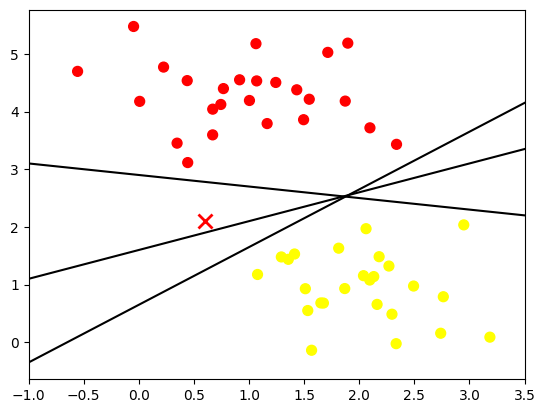

In [7]:
xfit = np.linspace(-1, 3.5, num=10)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

#Penjelasan kode baris ke 1
#np.linspace(-1, 3.5, num=10) digunakan untuk menentukan 10 titik dari rentang -1 sampai 3.5 jarak antar titik sama,
#jika tidak diberikan parameter num maka nilai defaultnya 50

#Penjelasan kode baris ke 3
# [0.6], [2.1] memberikan koordinat pada satu titik
# 'x' memberikan marker berbentuk x
# color='red' warna marker
# markeredgewidth=2 tebal garis pada marker
# markersize=10 ukuran marker

#Penjelasan baris ke 5
# m berarti kemiringan dan b berarti intersep(titik dimana garis memotong sumbu-y ketika nilai x=0)
# (1, 0.65) berarti m = 1, dan b = 0.65

#Penjelasan baris ke 6
#plt.plot untuk membuat garis
#(x.fit, m*xfit+b) menunjukan koordinat (x, y)
# -k untuk (-) berarti solid line dan k berarti garis berwarna hitam

#Penjelasan baris ke 8
#plt.xlim() mengatur batas sumbu-x dari -1 hingga 3.5, membatasi area yang terlihat pada plot.

In [8]:
print(xfit)

[-1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5]


(-1.0, 3.5)

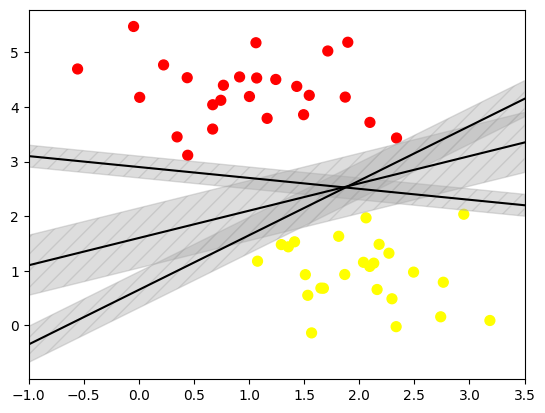

In [9]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4, hatch='//')


plt.xlim(-1, 3.5)

#Penjelasan kode
# kode sama seperti sebelumnya hanya saja ditambah plt.fill_beetween untuk mengarsir area diantara garis
# garis yang diarsir adalah antara (xfit, yfit-d) sampai (xfit, yfit+d)
# edgecolor='none' berarti menghilangkan garis tepi diarea yang diarsir
# alpha=0,4 berarti opacity atau transparansi sebanyak 40%

Penerapa fitting SVM

In [10]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

# Penjelasan kode
# SVC() adalah konstruktor untuk membangun model SVM
# kernel='linear' ini menentukan kernel yang akan digunakan oleh SVM
# C=1E10, variabel C merupakan parameter regulasi semakin besar nilai C semakin sedikit toleransi terhadap kesalahan klasifikasi

SVC(C=10000000000.0, kernel='linear')

In [11]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim() # xlim[0] mendapatkan limit nilai awal dan xlim[1] mendapatkan limit nilai akhir
    ylim = ax.get_ylim() # ylim[0] mendapatkan limit nilai awal dan ylim[1] mendapatkan limit nilai akhir

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30) # membuat 30 titik yang tersebar secara merata dari xlim[0] hingga xlim[1]
    y = np.linspace(ylim[0], ylim[1], 30) # membuat 30 titik yang tersebar secara merata dari ylim[0] hingga ylim[1]

    Y, X = np.meshgrid(y, x) # menghasilkan dua matriks 2D yang mengandung semua kombinasi nilai x dan y
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    # ravel() digunakan untuk membuat matriks 2D menjadi 1D
    # vstack() digunakan untuk menumpuk array 1D secara vertikal sehingga mendapatkan nilai (x,y)
    # .T berguna untuk mentransposisikan array sehingga setiap baris adalah pasangan, hasilnya setiap baris mewakili satu titik (x,y)
    P = model.decision_function(xy).reshape(X.shape)
    # reshape(X.shape) mengembalikan bentuk data ke awal
    # decision_function() pada model SVM digunakan untuk menghitung nilai decision function di setiap titik dalam grid.

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

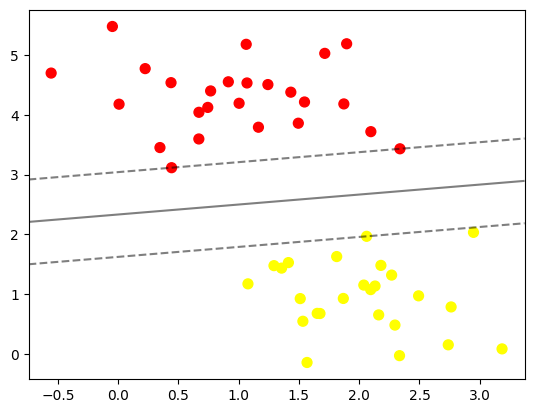

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [13]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

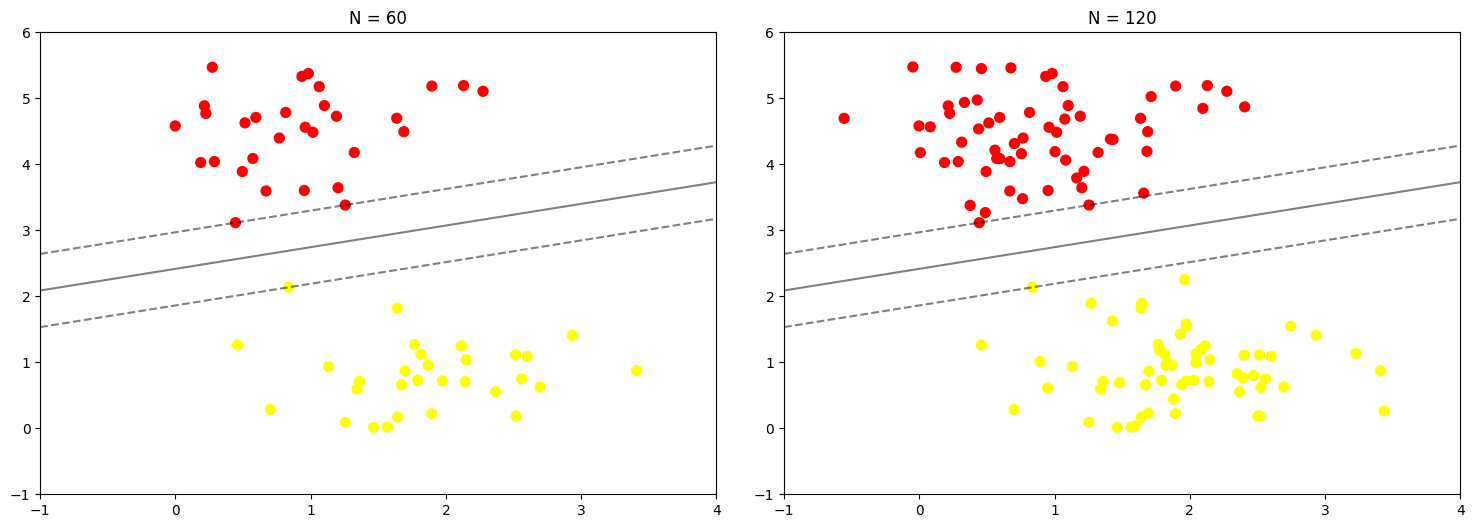

In [14]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

##Data Tidak Terpisah Secara Linier

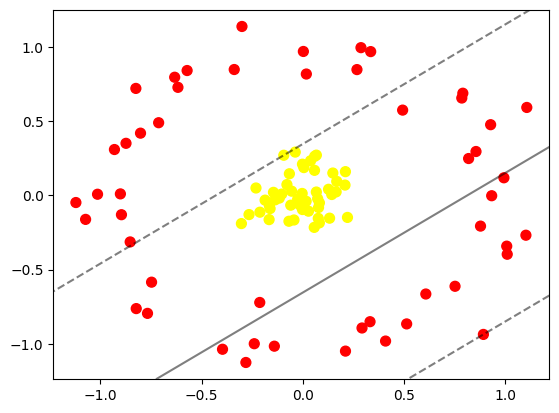

In [15]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [16]:
r = np.exp(-(X ** 2).sum(1))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 0.81939396,  0.24785689],
       [-0.30079077,  1.13731491],
       [ 0.79081603,  0.687763  ],
       [ 0.00499239,  0.18682731],
       [ 0.05639806, -0.2158928 ],
       [-0.037556  ,  0.29118953],
       [-0.10431696,  0.00839572],
       [-0.28144617, -1.12591278],
       [ 0.26750576,  0.84692986],
       [ 0.07326834, -0.02276548],
       [ 0.29252833, -0.89363276],
       [-0.16661998, -0.16360212],
       [ 0.99383376,  0.11810175],
       [-0.30357414, -0.19028581],
       [-0.82514732,  0.72012207],
       [ 0.40893544, -0.98164268],
       [-0.07856755,  0.07233659],
       [-0.05972638, -0.06639029],
       [ 0.07769222, -0.08199958],
       [-0.00330277,  0.01265829],
       [ 0.0278675 , -0.10677108],
       [ 0.92823146,  0.47572759],
       [ 0.16765503,  0.09397953],
       [ 0.85585898,  0.29511399],
       [-0.85331432, -0.31388764],
       [-0.39689472, -1.03685721],
       [-0.8021699 ,  0.41872189],
       [ 0.8924316 , -0.93693358],
       [ 0.75225523, -0.61266642],
       [-0.33901296,  0.8474013 ],
       [ 0.16463089,  0.02321808],
       [-0.57186075,  0.84058511],
       [-0.82332116, -0.76295234],
       [ 0.00266601,  0.96899459],
       [-0.01494238, -0.06446579],
       [-1.01457264,  0.00729552],
       [-0.05509857,  0.0278999 ],
       [ 0.51320922, -0.86617045],
       [ 0.2207154 , -0.14879245],
       [ 0.08167917, -0.18559496],
       [ 0.01738016,  0.8169966 ],
       [-0.18642882, -0.03244271],
       [-0.6332942 ,  0.79542117],
       [-0.8964086 , -0.1305599 ],
       [-0.14073359, -1.01619864],
       [-1.12155669, -0.04853172],
       [-0.9016337 ,  0.00963893],
       [-0.09409552,  0.26998435],
       [ 0.4932971 ,  0.57397039],
       [ 0.14830137,  0.15014226],
       [ 1.10254591, -0.26867053],
       [-0.87387788,  0.3503117 ],
       [-0.76762358, -0.79513829],
       [ 0.00418913, -0.0609229 ],
       [ 0.78566948,  0.65535917],
       [ 0.07632686, -0.1549679 ],
       [-0.04382319, -0.16608234],
       [ 0.1272074 ,  0.04070547],
       [ 0.06690781,  0.27077492],
       [ 0.05778594,  0.16833958],
       [-0.06860177, -0.17461062],
       [ 0.21058666,  0.15946847],
       [-0.61722607,  0.7273511 ],
       [ 0.14288916,  0.00553582],
       [ 1.00775442, -0.34237603],
       [-0.11629335, -0.01866549],
       [-1.07360516, -0.16205268],
       [-0.23152964,  0.04937117],
       [ 1.10695631,  0.59188324],
       [-0.26591282, -0.12974446],
       [ 0.06675665,  0.02218198],
       [-0.74755097, -0.58503339],
       [ 0.20849245,  0.069055  ],
       [ 0.05838367,  0.26244985],
       [ 0.60789973, -0.66474233],
       [ 0.21085983, -1.04937442],
       [ 0.33216092, -0.85125705],
       [-0.13716892, -0.03060995],
       [-0.00178323, -0.09570568],
       [-0.93105171,  0.30851097],
       [-0.23996723, -0.99954623],
       [ 0.93343468, -0.00274174],
       [-0.16551748, -0.06800162],
       [-0.16181116, -0.0893526 ],
       [ 0.14436531,  0.02256672],
       [-0.02550496, -0.02613295],
       [ 0.01635605, -0.03993787],
       [ 0.87823315, -0.20734157],
       [-0.14507875,  0.02005626],
       [-0.21286682, -0.72169864],
       [ 0.03828581,  0.23284502],
       [ 0.28738414,  0.99460258],
       [ 0.13229171, -0.15393253],
       [ 0.33539702,  0.96805663],
       [ 0.08190412, -0.05064282],
       [-0.21210361, -0.11361102],
       [-0.00175559,  0.20975596],
       [-0.71256338,  0.4890625 ],
       [-0.06643396,  0.14522816],
       [ 1.01019721, -0.39686132]]), y=array([0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0]))>

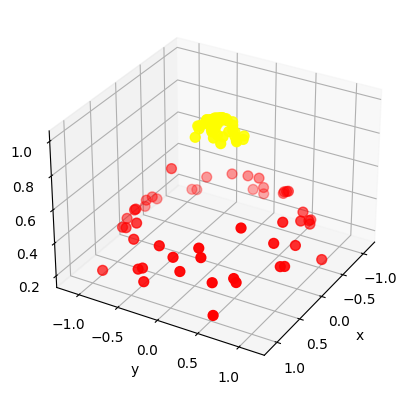

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180), X=fixed(X), y=fixed(y))

In [18]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

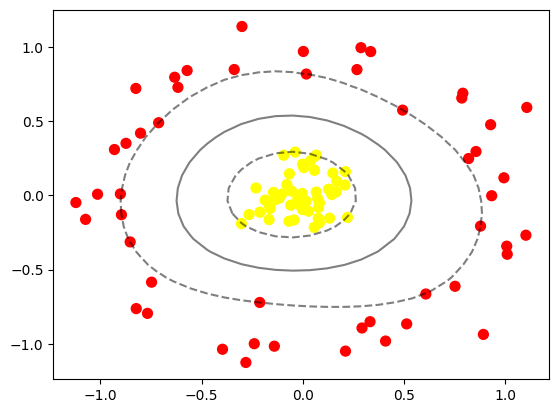

In [19]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

Data Overlap

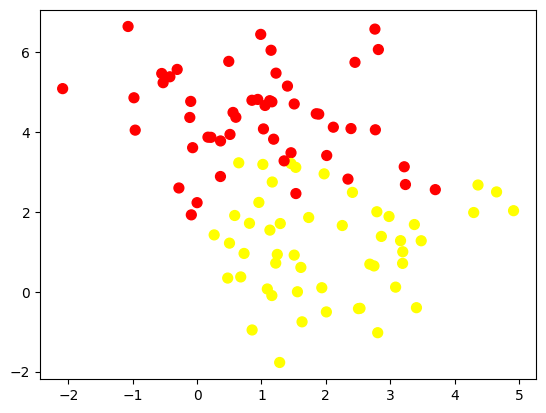

In [20]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

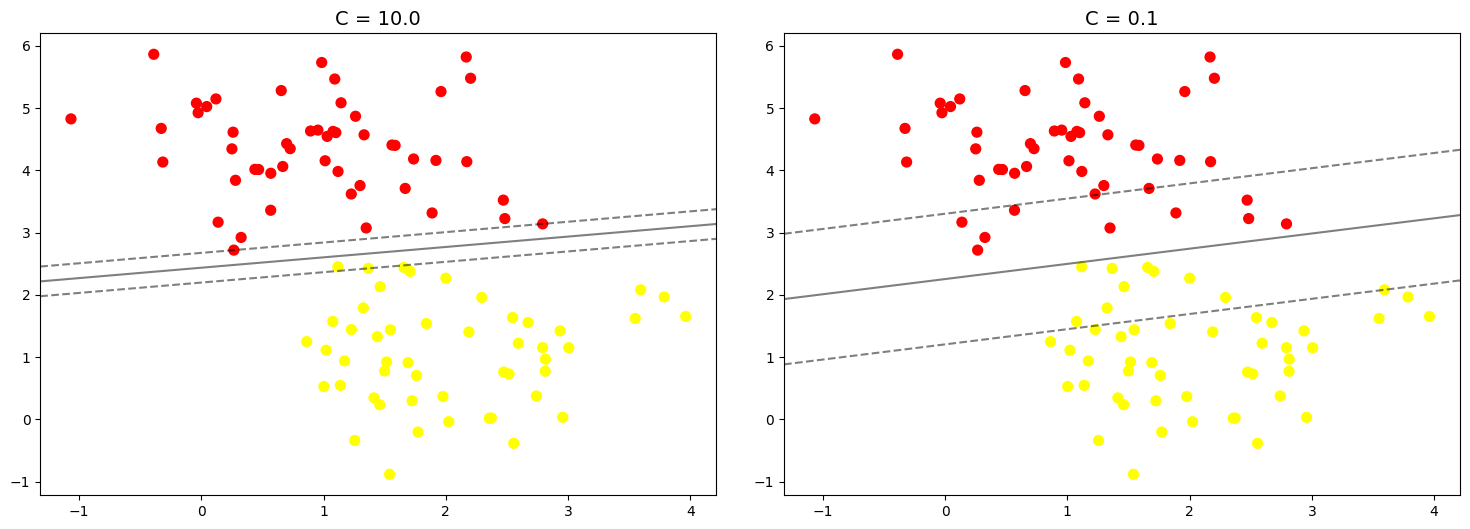

In [21]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)